In [1]:
from sklearn.datasets import make_classification
from sklearn import config_context
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from dask_ml.datasets import make_classification as make_classification_da

import sklearn

import numpy as np

#from dask.distributed import LocalCluster, Client
# cluster = LocalCluster()
# client = Client(cluster)

import dask.array as da

+ /Users/thomasli/opt/miniconda3/envs/scikit-learn/bin/ninja
ninja: no work to do.


In [2]:
n_samples = 1000
# n_classes needs to be 2 to use dask-ml
n_classes = 2
n_informative = 5

X_np, y_np = make_classification(n_samples=n_samples, n_informative=5, n_classes=n_classes, random_state=0)

X_da = da.asarray(X_np)
y_da = da.asarray(y_np)
#X_da, y_da = make_classification_da(n_samples=n_samples, n_informative=5, n_classes=n_classes, random_state=0, chunks=10000)

In [3]:
X_da.compute()

array([[-0.21557894, -0.76915629,  0.44516893, ...,  0.59182262,
         0.17410622, -1.21632306],
       [ 0.39144616, -1.2495532 ,  0.07612169, ..., -3.44997231,
         0.60389434, -1.11455745],
       [ 1.10223985, -0.64148454,  0.95992178, ...,  0.98654036,
        -0.25130458, -0.61816945],
       ...,
       [-0.49072142, -0.19558798,  1.33805243, ..., -1.2944931 ,
        -0.39244347,  1.44961478],
       [-0.11685443,  0.02602464, -0.92866173, ..., -2.42271799,
        -0.24541818,  2.89062759],
       [ 0.53228385, -0.37930272, -0.15093679, ..., -0.57520515,
         0.22115706,  0.23997697]])

In [4]:
# np.testing.assert_allclose(X_np, X_da)
# np.testing.assert_allclose(y_np, y_da)

In [5]:
X_da = X_da.rechunk('auto')
y_da = y_da.rechunk('auto')

In [6]:
with config_context(array_api_dispatch=True):
    lda = LinearDiscriminantAnalysis()
    X_trans_da = lda.fit_transform(X_da, y_da)
X_trans_da.compute()

array([[-1.15767135e+00],
       [ 2.48562534e+00],
       [-2.48128592e-01],
       [ 1.47981987e+00],
       [-2.53546638e+00],
       [-1.65378134e+00],
       [ 1.42023498e+00],
       [ 3.84883862e+00],
       [-1.32286565e+00],
       [ 1.35891987e+00],
       [-1.08316579e+00],
       [-1.52751438e+00],
       [-1.24168621e+00],
       [-9.94896112e-02],
       [-1.51130924e+00],
       [ 1.17657452e+00],
       [ 2.98298692e-01],
       [ 1.80877642e+00],
       [-2.56663579e+00],
       [-2.16808593e+00],
       [ 2.20389273e+00],
       [ 8.83624664e-01],
       [-8.96392433e-01],
       [ 9.32433773e-01],
       [ 1.91180553e+00],
       [-1.30943364e+00],
       [ 2.65836930e+00],
       [-2.20603600e-01],
       [ 1.17980267e+00],
       [-1.78509669e+00],
       [-1.82528357e+00],
       [-1.32831512e+00],
       [-1.75656627e+00],
       [ 3.54036151e-01],
       [-1.44308907e+00],
       [-6.29841408e-01],
       [ 2.36031326e+00],
       [-5.14932228e-01],
       [-1.5

In [7]:
# sklearn.set_config(array_api_dispatch=True)
# lda = LinearDiscriminantAnalysis()
# X_trans_da = lda.fit_transform(X_da, y_da)

In [8]:
#%load_ext snakeviz
#%load_ext line_profiler
#%lprun -u 1e-3 -f LinearDiscriminantAnalysis._solve_svd lda.fit_transform(X_da, y_da)
#%snakeviz -t lda.fit_transform(X_da, y_da)

In [9]:
sklearn.set_config(array_api_dispatch=False)

In [10]:
lda = LinearDiscriminantAnalysis()
X_trans = lda.fit_transform(np.asarray(X_da), np.asarray(y_da))
X_trans

array([[-1.15767135e+00],
       [ 2.48562534e+00],
       [-2.48128592e-01],
       [ 1.47981987e+00],
       [-2.53546638e+00],
       [-1.65378134e+00],
       [ 1.42023498e+00],
       [ 3.84883862e+00],
       [-1.32286565e+00],
       [ 1.35891987e+00],
       [-1.08316579e+00],
       [-1.52751438e+00],
       [-1.24168621e+00],
       [-9.94896112e-02],
       [-1.51130924e+00],
       [ 1.17657452e+00],
       [ 2.98298692e-01],
       [ 1.80877642e+00],
       [-2.56663579e+00],
       [-2.16808593e+00],
       [ 2.20389273e+00],
       [ 8.83624664e-01],
       [-8.96392433e-01],
       [ 9.32433773e-01],
       [ 1.91180553e+00],
       [-1.30943364e+00],
       [ 2.65836930e+00],
       [-2.20603600e-01],
       [ 1.17980267e+00],
       [-1.78509669e+00],
       [-1.82528357e+00],
       [-1.32831512e+00],
       [-1.75656627e+00],
       [ 3.54036151e-01],
       [-1.44308907e+00],
       [-6.29841408e-01],
       [ 2.36031326e+00],
       [-5.14932228e-01],
       [-1.5

In [11]:
# from sklearn.model_selection import train_test_split
# with config_context(array_api_dispatch=True):
#    X_da_train, X_da_test, y_da_train, y_da_test = train_test_split(X_da, y_da, test_size=0.33, random_state=42)

In [12]:
#X_da_train.compute()

In [13]:
#X_da_test.compute()

# PCA Example

explained variance ratio (first two components): [0.92461872 0.05306648]


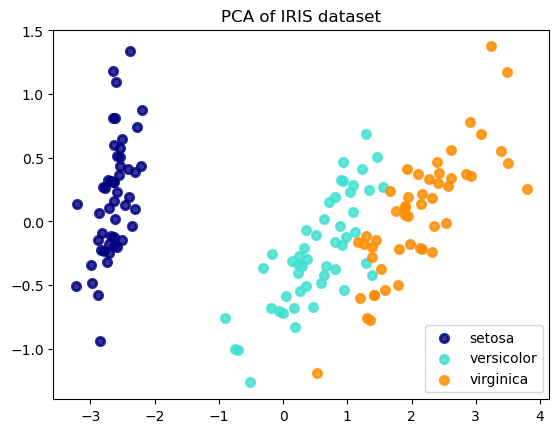

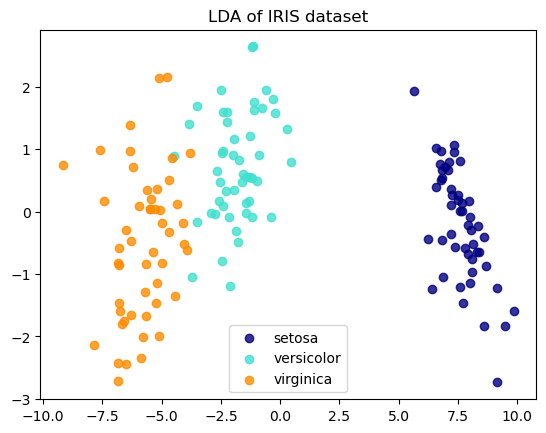

In [14]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

explained variance ratio (first two components): [0.92461872 0.05306648]


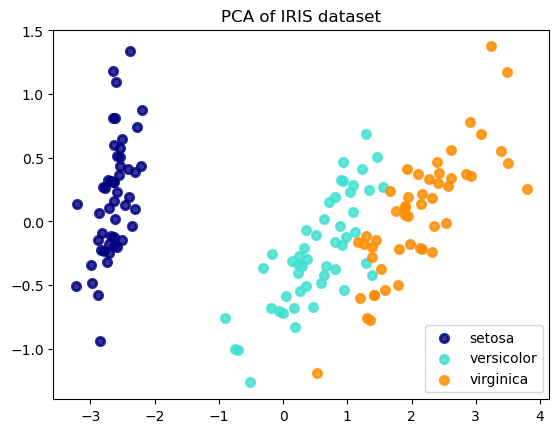

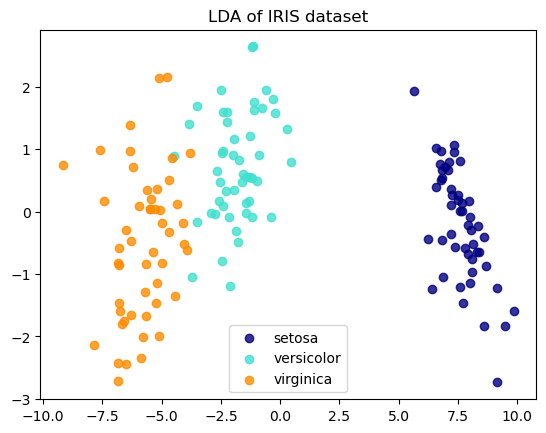

In [15]:
# Now the dask version
from sklearn import config_context
import dask.array as da

X_da = da.asarray(X)
y_da = da.asarray(y)

with config_context(array_api_dispatch=True):
    pca = PCA(n_components=2)
    X_r = pca.fit(X_da).transform(X_da)
    
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_r2 = lda.fit(X_da, y_da).transform(X_da)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_.compute())
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import config_context
import dask.array as da

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
X_da = da.asarray(X)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
y_da = da.asarray(y)

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
reg.predict(np.array([[3, 5]]))

1.0
[1. 2.]
3.0000000000000018


array([16.])

In [17]:
with config_context(array_api_dispatch=True):
    reg = LinearRegression().fit(X_da, y_da)
    #print(reg.score(X, y))
    print(reg.coef_)
    print(reg.intercept_)
    print(reg.predict(da.array([[3, 5]])))

[1. 2.]
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
dask.array<add, shape=(1,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
